In [36]:
import os
import numpy as np
import pandas as pd
import statistics as st
from scipy import signal
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
data1n = []
data2n = []
root_filter = 'Filtered'
emosi = ['NH','NL','PH','PL']
# pasien = ['adit','agus','amin','eka','hasna','riznop']
pasien = ['adit','agus','amin','bagus','basith','eka','hanif','rizki']
stdvn1 = []
rrtn1 = []
mdn1 = []
stdvn2 = []
rrtn2 = []
mdn2 = []
emosi_list = []
count = 0
root_extract = 'IAPS hari 1'
rawdata = []
pipi = []
alis = []
wkt = []
count = 0
header_list = ['Waktu','Pipi','Alis']
data = []
X = []
y = []

In [45]:
# int((len(dirs2)-1)/4)+1
def extract_feature(folder):
    dirs2 = os.listdir(folder)
    count = 0
    root = 'IAPS1_extract'
    for y in pasien:
        for i in emosi:
            for j in range(1,6):
                df = pd.read_csv(folder+'/'+y+i+str(j)+'.csv')
                print(folder+'/'+y+i+str(j)+'.csv')
                data1 = list(df['Pipi'].to_numpy())
                data2 = list(df['Alis'].to_numpy())
                stdv1 = st.stdev(data1)
                rrt1 = st.mean(data1)
                md1 = st.median(data1)
                stdvn1.append(stdv1)
                rrtn1.append(rrt1)
                mdn1.append(md1)
                stdv2 = st.stdev(data2)
                rrt2 = st.mean(data2)
                md2 = st.median(data2)
                stdvn2.append(stdv2)
                rrtn2.append(rrt2)
                mdn2.append(md2)
                if(i == 'NH'):
                    mk = 1
                    emosi_list.append(mk)
                elif(i == 'NL'):
                    mk = 2
                    emosi_list.append(mk)
                elif(i == 'PH'):
                    mk = 3
                    emosi_list.append(mk)
                elif(i == 'PL'):
                    mk = 4
                    emosi_list.append(mk)
#                 print('Selesai !')
    namafile = 'iaps2_extracted.csv'
#     namafile = 'tes_extracted2.csv'
    finaldirs = os.path.join(root,namafile)
    df1 = pd.DataFrame({'STDEV1' : stdvn1,'AVG1' : rrtn1,'MDN1' : mdn1,
                        'STDEV2':stdvn2,'AVG2' : rrtn2,'MDN2' : mdn2,'EMOSI' : emosi_list})
    df1.to_csv(finaldirs,mode='w+',index=False)
    print(finaldirs)
    stdvn1.clear()
    rrtn1.clear()
    mdn1.clear()
    stdvn2.clear()
    rrtn2.clear()
    mdn2.clear()
    emosi_list.clear()
    print('Ekstraksi Fitur Selesai !')
            #namafile = i+'_extracted.csv'
            #finaldirs = os.path.join(root,namafile)
            #if(i == 'kaget'):
            #    i = 1
            #elif(i == 'marah'):
            #    i = 2
            #elif(i == 'santai'):
            #    i = 3
            #elif(i == 'senang'):
            #    i = 4
            #df1 = pd.DataFrame({'STDEV1' : stdvn1,'AVG1' : rrtn1,'MDN1' : mdn1,
            #                    'STDEV2':stdvn2,'AVG2' : rrtn2,'MDN2' : mdn2,'EMOSI' : i})
            #df1.to_csv(finaldirs,mode='w+')
            #print(finaldirs)
            #stdvn1.clear()
            #rrtn1.clear()
            #mdn1.clear()
            #stdvn2.clear()
            #rrtn2.clear()
            #mdn2.clear()

def create_model():
    model = keras.models.Sequential([
            keras.layers.LSTM(8, return_sequences=True, input_shape=[None,6]),
            keras.layers.LSTM(8),
            keras.layers.Dense(4, activation='softmax')
            ])
    model.compile(
        loss="categorical_crossentropy",
        optimizer=keras.optimizers.Adam(lr=0.01),
        metrics=["acc"]
    )
    model.summary()
    return model


In [ ]:
# extract_feature('IAPS2_filter')

In [71]:
keras.backend.clear_session()
# model = create_model()
# model = keras.models.load_model('iaps_real1')
# model = keras.models.load_model('iaps_real2')
# model = keras.models.load_model('iaps_real3')
model = keras.models.load_model('iaps_real4')
# model = keras.models.load_model('lstm_iaps100')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 8)           480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense (Dense)                (None, 4)                 36        
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________


(502, 1, 6)
(502, 4)
(258, 1, 6)
(258, 4)
Epoch 1/30
26/26 [==============================] - 6s 54ms/step - loss: 0.3308 - acc: 0.8805 - val_loss: 0.3045 - val_acc: 0.8798
Epoch 2/30
26/26 [==============================] - 0s 5ms/step - loss: 0.3216 - acc: 0.8765 - val_loss: 0.2918 - val_acc: 0.8837
Epoch 3/30
26/26 [==============================] - 0s 5ms/step - loss: 0.3232 - acc: 0.8785 - val_loss: 0.3546 - val_acc: 0.8566
Epoch 4/30
26/26 [==============================] - 0s 6ms/step - loss: 0.2849 - acc: 0.8865 - val_loss: 0.3346 - val_acc: 0.8837
Epoch 5/30
26/26 [==============================] - 0s 6ms/step - loss: 0.2997 - acc: 0.8785 - val_loss: 0.4092 - val_acc: 0.8372
Epoch 6/30
26/26 [==============================] - 0s 6ms/step - loss: 0.2837 - acc: 0.8845 - val_loss: 0.3408 - val_acc: 0.8837
Epoch 7/30
26/26 [==============================] - 0s 7ms/step - loss: 0.2665 - acc: 0.8884 - val_loss: 0.3420 - val_acc: 0.8837
Epoch 8/30
26/26 [=============================

INFO:tensorflow:Assets written to: iaps_real5\assets


INFO:tensorflow:Assets written to: iaps_real5\assets


Model berhasil disimpan !


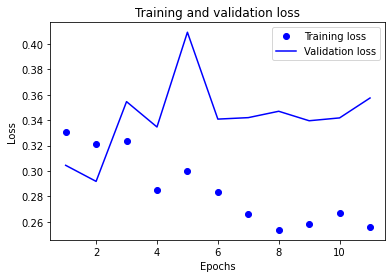

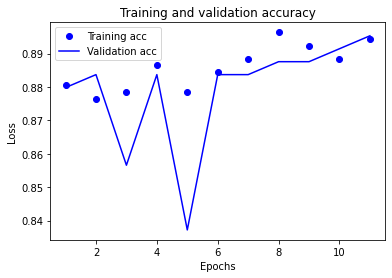

In [72]:
X = []
y = []
maindirs = 'IAPS1_extract'
dirs = os.listdir(maindirs)
emosi = ['NH','NL','PH','PL']
df = pd.read_csv(maindirs+"/"+"iaps2_extracted.csv")
d_t = df.drop('EMOSI',axis=1)
label = pd.get_dummies(df['EMOSI'])
data_len = int(len(d_t))
for i in range (0,data_len):
    temp = d_t.iloc[i]
    temp_list = temp.values.tolist()
    X.append(temp_list)
for j in range(0,data_len):
    temp1 = label.iloc[j]
    temp1_list = temp1.values.tolist()
    y.append(temp1_list)
X = np.array(X)
y = np.array(y)
length = 760
num_train = 502
index = np.random.randint(0,length, size=length)
train_X = X[index[0:num_train]]
train_Y = y[index[0:num_train]]
test_X = X[index[num_train:]]
test_Y = y[index[num_train:]]
# train_X = X[0:num_train]
# train_Y = y[0:num_train]
# test_X = X[num_train:]
# test_Y = y[num_train:]
train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
     train_X,
     train_Y,
     batch_size = 20,
     epochs=30,
     callbacks=[callback],
     validation_data=(test_X,test_Y),
     )
inpoot = int(input("Apakah mau simpan model ? "))
if inpoot == 1:
    nama_model = str(input('Nama model = '))
    model.save(nama_model)
    model.save_weights(nama_model+'.h5')
    print("Model berhasil disimpan !")
    keras.backend.clear_session()
else:
    print("ga disimpen")
    keras.backend.clear_session()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [157]:
# maindirs = 'IAPS1_extract'
# dirs = os.listdir(maindirs)
# emosi = ['NH','NL','PH','PL']
# df = pd.read_csv(maindirs+"/"+"tes_extracted.csv")
# d_t = df.drop('EMOSI',axis=1)
# label = pd.get_dummies(df['EMOSI'])
# data_len = int(len(d_t))
# for i in range (0,data_len):
#     temp = d_t.iloc[i]
#     temp_list = temp.values.tolist()
#     X.append(temp_list)
# for j in range(0,data_len):
#     temp1 = label.iloc[j]
#     temp1_list = temp1.values.tolist()
#     y.append(temp1_list)
# X = np.array(X)
# y = np.array(y)
# X = []
# y = []
count = 0
while count <= 10:
    X = []
    y = []
    maindirs = 'IAPS1_extract'
    dirs = os.listdir(maindirs)
    emosi = ['NH','NL','PH','PL']
    df = pd.read_csv(maindirs+"/"+"iaps2_extracted.csv")
    d_t = df.drop('EMOSI',axis=1)
    label = pd.get_dummies(df['EMOSI'])
    data_len = int(len(d_t))
    for i in range (0,data_len):
        temp = d_t.iloc[i]
        temp_list = temp.values.tolist()
        X.append(temp_list)
    for j in range(0,data_len):
        temp1 = label.iloc[j]
        temp1_list = temp1.values.tolist()
        y.append(temp1_list)
    X = np.array(X)
    y = np.array(y)
    length = 720
    num_train = 324
    index = np.random.randint(0,length, size=length)
    train_X = X[index[0:num_train]]
    train_Y = y[index[0:num_train]]
    test_X = X[index[num_train:]]
    test_Y = y[index[num_train:]]
    train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
    y_pred = model.predict(test_X)
    matrix = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
    print('NH,NL,PH,PL')
    print(matrix)
    print(classification_report(test_Y.argmax(axis=1), y_pred.argmax(axis=1), digits=3,target_names=emosi))
    count+=1

NH,NL,PH,PL
[[77  9  2  3]
 [ 3 94  1  5]
 [ 3  8 90  2]
 [ 2 12  1 84]]
              precision    recall  f1-score   support

          NH      0.906     0.846     0.875        91
          NL      0.764     0.913     0.832       103
          PH      0.957     0.874     0.914       103
          PL      0.894     0.848     0.870        99

    accuracy                          0.871       396
   macro avg      0.880     0.870     0.873       396
weighted avg      0.879     0.871     0.873       396

NH,NL,PH,PL
[[86 12  0  3]
 [ 4 93  3  7]
 [ 0  9 85  3]
 [ 2  9  3 77]]
              precision    recall  f1-score   support

          NH      0.935     0.851     0.891       101
          NL      0.756     0.869     0.809       107
          PH      0.934     0.876     0.904        97
          PL      0.856     0.846     0.851        91

    accuracy                          0.861       396
   macro avg      0.870     0.861     0.864       396
weighted avg      0.868     0.861     0